# Pairplotr description
The point of this demo is to demonstrate the Pandas dataframe visualization tool I wrote for exploratory data analysis.

This demo imports the titanic dataset that I cleaned for a separate machine-learning tutorial (possibly not posted yet). 

# Import dependencies

In [1]:
%matplotlib inline

import sys

import pairplotr as ppr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Unpickle data

In [2]:
df = pd.read_pickle('trimmed_titanic_data.pkl')

# Inspect data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Title       891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


Note, how the data has no missing values.

In [4]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.000000,1,0,7.2500,S,Mr
1,1,1,female,38.000000,1,0,71.2833,C,Mrs
2,1,3,female,26.000000,0,0,7.9250,S,Miss
3,1,1,female,35.000000,1,0,53.1000,S,Mrs
4,0,3,male,35.000000,0,0,8.0500,S,Mr
5,0,3,male,35.050324,0,0,8.4583,Q,Mr
6,0,1,male,54.000000,0,0,51.8625,S,Mr
7,0,3,male,2.000000,3,1,21.0750,S,Child
8,1,3,female,27.000000,0,2,11.1333,S,Mrs
9,1,2,female,14.000000,1,0,30.0708,C,Mrs


Additionally, the data must have no fields that could be considered an id. For instance, the Titanic survival dataset had a PassengerId field that I removed. 

# Infer categories of features and correct
The first step, starting for squeaky clean data, is to make a dictionary asserting that each feature data type is either numberical or categorical. The pairplotr.infer_feature_types() method can be used to do this. Care must be taken to inspect the results beause integers are counted as numberical, even though they might be meant to represent categories:

In [5]:
data_types = ppr.infer_feature_types(df,suppress_report=False)


----------------------------------------
Data type	Feature
----------------------------------------
numerical	Fare
category	Embarked
numerical	Age
category	Title
category	Parch
category	Pclass
category	Sex
category	Survived
category	SibSp
----------------------------------------


The above output can be suppressed by changing the suppress_report keyword argument to True.

SibSp is an integer count. There are so few I prefer it as a category for visualization. It can be changed to numerical by setting its dictionary entry to it like in the commented out line below:

In [6]:
# data_types['SibSp'] = 'numerical'

data_types

{'Age': 'numerical',
 'Embarked': 'category',
 'Fare': 'numerical',
 'Parch': 'category',
 'Pclass': 'category',
 'Sex': 'category',
 'SibSp': 'category',
 'Survived': 'category',
 'Title': 'category'}

Now that the desired types have been stored in a dictionary we can more on to graphing the pair plot.

## Plot description
Plot details vary according to whether they are on- or off-diagonal and whether the intersecting rows and columns correspond to numerical or categorical variables:

- On-diagonal:
  - Categorical feature:
    - Horizontal bar chart of the counts of each feature value colored according to that value.
      - It, along with y-tick labels on the left of the grid, acts as a legend for the row feature values.
        - Ex: Cell (2,2) tells us that Pclass (value,color) pairs are (3,grey), (1,cyan), (2,orange).
  - Numerical feature:
    - Histogram of feature.
- Off-diagonal:
  - Categorical feature row and categorical feature column.
    - Horizontal stacked bar chart of row feature for each value of the column feature and colored accordingly.
  - Categorical feature row and Numerical feature column.
    - Overlapping histograms of column feature for each value of the row feature and colored accordingly.
  - Numerical feature row and Numerical feature column.
    - Scatter plot of row feature veruss column feature.
      - Optionally, colored by a feature dictated by scatter_plot_filter keyword argument.

# Example pairplot and interpretation
To plot all pair-wise features simply run the compare_data() method like this:

CPU times: user 7.35 s, sys: 396 ms, total: 7.74 s
Wall time: 8.49 s


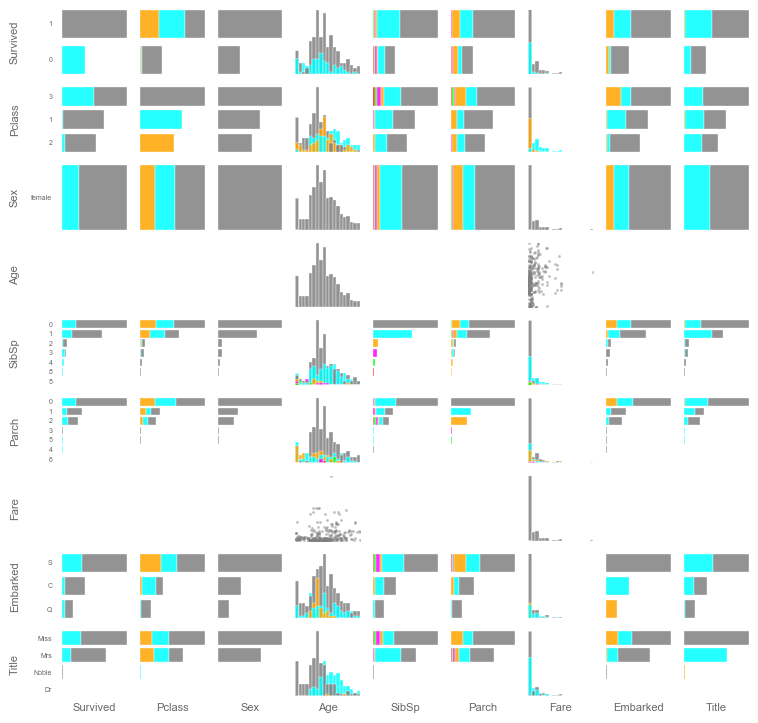

In [15]:
%%time
ppr.compare_data(df[df['Sex']=='female'],data_types=data_types)

From row 2 column 1, we see that Pclass 1 has more that survived than died. If we look at row 2 column 3, we see that 

If we see something interesting we can specify less features to plot. For instance, by looking at row 8 column 2, it looks like Embarked value Q doesn't appear to have any of Pclasses 1 or 2. We can specify less features by using the plot_vars keyword argument like this:  

CPU times: user 7.76 s, sys: 335 ms, total: 8.09 s
Wall time: 8.43 s


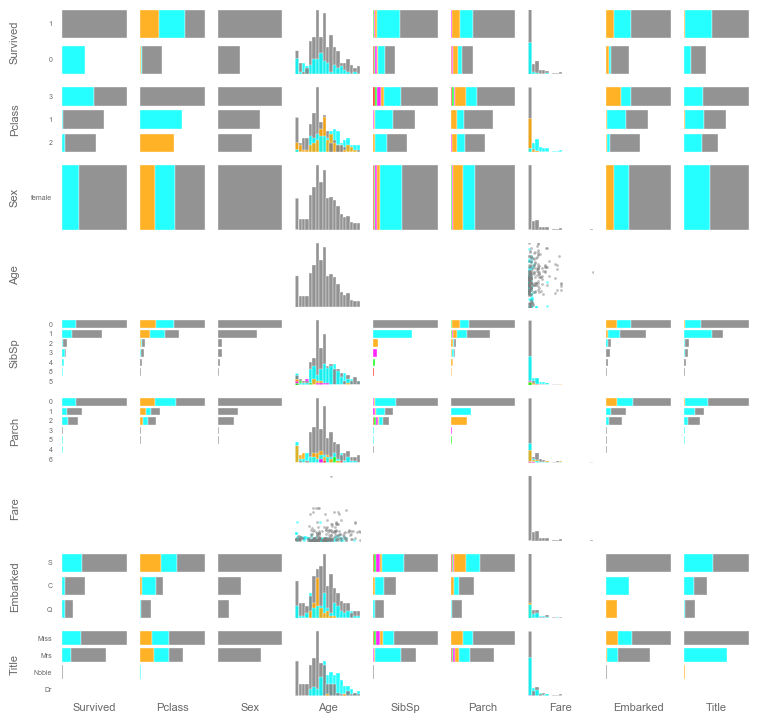

In [23]:
%%time
import pairplotr as ppr
reload(ppr)
ppr.compare_data(df[df['Sex']=='female'],data_types=data_types,
                 plot_vars=[],scatter_plot_filter='Survived')

By zooming in we can see that there are a small number of Pclass 1 within the Embarked Q population.